## DANE WEJŚCIOWE - klasyfikacja ich


In [1]:
[
    'Blockiness',
    'SA',
    'Blockloss', 
    'Blur',
    'TA',
    'Exposure',
    'Contrast',
    'Noise',
    'Slice',
    'Flickering'
]

['Blockiness',
 'SA',
 'Blockloss',
 'Blur',
 'TA',
 'Exposure',
 'Contrast',
 'Noise',
 'Slice',
 'Flickering']

# na podstawie dwóch danych wejście i target stworzyć model, następnie zbudować decision tree, decision forest 
Zbudować tak program żeby generowało model np 10 tyś razy
i ocenić jaki jest precision - w sensie prawidłowość modelu.
Zaczytać csv do numpy, dostaniemy 2 klasy z pliku target

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
data_in = np.genfromtxt('all_DB_data.csv', delimiter=',')

In [4]:
target = np.genfromtxt('all_DB_target.csv', delimiter=',')


In [5]:
clf = DecisionTreeClassifier()

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(data_in, target, test_size=0.3)

In [22]:
clf.fit(X_train,Y_train)
print (clf.feature_importances_)

[0.18159136 0.         0.         0.         0.02306139 0.
 0.06367429 0.61504897 0.         0.11662398]


In [23]:
print(clf.score(X_test, Y_test))

0.9512195121951219


In [39]:
sample_table_tree = []
data_tree = []
score_tree = []
for sample_id in range (100):
    sample_table_tree.append(clf.fit(X_train,Y_train).feature_importances_)
    score_tree.append(clf.fit(X_train,Y_train).score(X_test, Y_test))
    data_tree.append(clf.fit(X_train,Y_train).predict_proba(X_test))
    

In [40]:
clf_forest = RandomForestClassifier()
sample_table = []
data = []
score = []
for sample_id in range (100):
    sample_table.append(clf_forest.fit(X_train,Y_train).feature_importances_)
    score.append(clf_forest.fit(X_train,Y_train).score(X_test, Y_test))
    data.append(clf_forest.fit(X_train,Y_train).predict_proba(X_test))

In [41]:
data_tree= pd.DataFrame(score_tree )
data_f = pd.DataFrame(score )


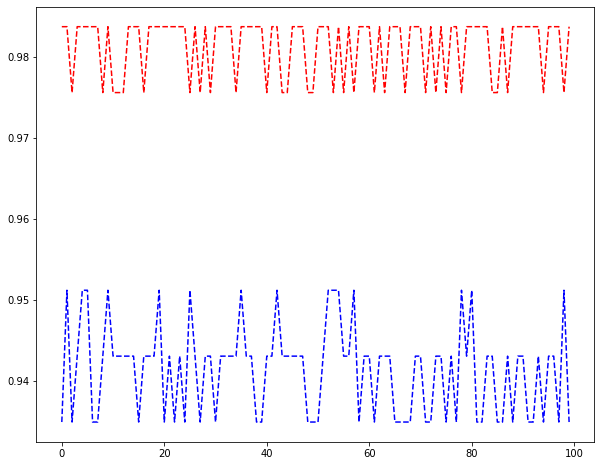

In [42]:
plt.figure(figsize=(10,8), num=200)
plt.plot(data_f,'r--',data_tree,'b--')



In [30]:
DF_30_FOREST = pd.DataFrame(sample_table_tree)

In [33]:
DF_30_FOREST.to_csv('DF_30_forest.csv')


In [37]:
X_test.shape

(123, 10)

In [38]:
data_f

,0
0,0.98374
1,0.98374
2,0.97561
3,0.98374
4,0.98374
5,0.98374
6,0.98374
7,0.98374
8,0.98374
9,0.98374
